In [41]:
%matplotlib inline

In [42]:
#-----------------------------------------------------------
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import cm        # module palettes de couleurs
import pandas as pd
import seaborn as sns

from fonctions_effetDeSerre import EffetDeSerre

from sklearn.decomposition import PCA


#-----------------------------------------------------------
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (18, 6)
#np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth = 220)
np.set_printoptions(precision=4)
#np.set_printoptions(precision=3,formatter={'float': '{:9.3f}'.format})
pd.set_option('precision', 5)
pd.set_option("display.max_columns",20)
pd.set_option('display.max_rows', 999)
#pd.set_option('max_colwidth', 6)

In [43]:
linestyles = [(0, ()), # solid 
              (0, (5, 10)),(0, (5, 5)),(0, (5, 1)), # dashed (loosely/normal/densely)
              (0, (3, 10, 1, 10)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)), # dotted  (loosely/normal/densely)
              (0, (3, 10, 1, 10, 1, 10)),(0, (3, 5, 1, 5, 1, 5)),(0, (3, 1, 1, 1, 1, 1)), # dashdotted(loosely/normal/densely)
              (0, (1, 10)),(0, (1, 5)),(0, (1, 1))]
couleurs = cm.Dark2.colors

# ACP et effet de serre

***

Les données que nous utiliserons sont issues d’une sélection de la base de données ERA-Interim
du centre européen ECMWF. Il s’agit de données modèles pour 5 variables sur 9 lieux
géographiques. Nous disposons également de mesures de CO 2 réalisées sur le mont Mauna Loa à
Hawaii, données qui proviennent de la NOAA. Pour chacune de ces variables nous avons calculé une
moyenne mensuelle de la période allant de janvier 1982 à décembre 2010, soit 29 années
complètes. Pour les 9 lieux, il y a deux sortes de données :
- les données analysées proviennent des modèles au sortir de l’assimilation des données en se positionnant à midi.
- les données de prévision (dites « Forecast ») sont obtenues en faisant fonctionner le modèle 24 heures après une assimilation, elles sont donc aussi positionnées à midi. Elles présentent plus d’incertitude que les premières.

Liste des variables:
1) Données Analysées à midi :
 - t2 : Temperature at 2 meters (degC) ( Température à 2 mètres ) clim_t2C_J1982D2010.mat
 - tcc : Total cloud cover (0-1) ( Couverture nuageuse total )    clim_tcc_J1982D2010.mat
2) Données de Prévisions à midi (assimilation 24h avant)
 - lsp : Large scale precipitation (m) ( Précipitation à large échelle ) clim_lsp_J1982D2010.mat
 - cp : Convective precipitation (m) ( Précipitation convective ) clim_cp_J1982D2010.mat
 - ssr : Surface solar radiation ((W/m^2)s) ( Radiation solaire de surface ) clim_ssr_J1982D2010.mat
3) co 2 : molfrac ppm (parties par million) clim_co2_J1982D2010.mat

Excepté le CO 2 , les lieux pour lesquels nous avons extrait les valeurs des variables sont dans
l’ordre du nord au sud :
 - Reykjavik .................. 64°08'07.14"N   21°53'42.63"O
 - Oslo ....................... 59°54'49.85"N   10°45'08.18"E
 - Paris ...................... 48°51'12.03"N    2°20'55.59"E
 - New York ................... 40°42'51.67"N   74°00'21.50"O
 - Tunis ...................... 36°49'07.72"N   10°09'57.46"E
 - Alger ...................... 36°45'10.39"N    3°02'31.37"E
 - Beyrouth ................... 33°53'19.06"N   35°29'43.72"E
 - Atlan27N40W ................ 27°00'00.00"N   40°00'00.00"O
 - Dakar ...................... 14°39'46.09"N   17°26'13.65"O


Contenu des fichiers :
- 1 ère colonne : l’année
- 2 ème colonne : le mois
- Colonnes 3 à 11 : valeur de la variable pour les 9 lieux dans l’ordre où on les a énumérés.

Pour le fichier de $CO_2$ on retrouve les mêmes deux 1ères colonnes et une 3ème colonne pour la valeur de concentration du $CO_2$.
A noter que tous les fichiers fournis, pour ce TP, sont en correspondance sur les deux premières colonnes, elles contiennent donc le même nombre de lignes (N=348).



## Chargement des données :

Pour charger les données, on utilise, ici, on fonction déjà réalisée.

In [44]:
# chargement des données complètes
lesDonnees = EffetDeSerre()
listeDesLieux = list(lesDonnees.noms_des_lieux)
lesNomsDeMesures = list(lesDonnees.noms_des_mesures)

Lors de la séance, on va considérer différents cas de figure.    
Une partie de ces cas de figures est prise en charge ci-dessous.

In [45]:
strChoix = "toutesLesMesures-tousLesTemps-Reykjavik"
#strChoix = "toutesLesMesures-interannuelle-Reykjavik"
#strChoix = "toutesLesMesures-climatologie-Reykjavik"
#strChoix = "temperature-climatologie-toutesLesVilles"
if strChoix == "toutesLesMesures-climatologie-Reykjavik":
    seLimiterAUnLieu    = True  # False # 
    indiceLieu = 0    # Reykjavik (utilisée ssi seLimiterAUnLieu vraie)
    seLimiterAUneMesure = False # True  # 
    indiceMesure = 0  # -- (utilisée ssi seLimiterAUneMesure vraie)
    etudeClimatologie = True  # False # 
    etudeInterAnnuel  = False # True  # 
    label_variables = 'mesures [Moyennes  climatologiques]'
    label_temps = 'mois et années'
elif strChoix == "toutesLesMesures-tousLesTemps-Reykjavik":
    seLimiterAUnLieu    = True  # False # 
    indiceLieu = 0    # Reykjavik (utilisée ssi seLimiterAUnLieu vraie)
    seLimiterAUneMesure = False # True  # 
    indiceMesure = 0  # -- (utilisée ssi seLimiterAUneMesure vraie)
    etudeClimatologie = False # True  # 
    etudeInterAnnuel  = False # True  # 
    label_variables = 'mesures [Moyennes mensuelles]'
    label_temps = 'mois et années'
elif strChoix == "toutesLesMesures-interannuelle-Reykjavik":
    seLimiterAUnLieu    = True  # False # 
    indiceLieu = 0    # Reykjavik (utilisée ssi seLimiterAUnLieu vraie) 
    seLimiterAUneMesure = False # True  # 
    indiceMesure = 0  # -- (utilisée ssi seLimiterAUneMesure vraie)
    etudeClimatologie = False # True  # 
    etudeInterAnnuel  = True  # False # 
    label_variables = 'mesures [Moyennes annuelles]'
    label_temps = 'mois et années'
elif strChoix == "temperature-climatologie-toutesLesVilles":
    seLimiterAUnLieu    = False # True  # 
    indiceLieu = 0    # Reykjavik (utilisée ssi seLimiterAUnLieu vraie) 
    seLimiterAUneMesure = True  # False # 
    indiceMesure = 0  # t2 (utilisée ssi seLimiterAUneMesure vraie)
    etudeClimatologie = True  # False # 
    etudeInterAnnuel  = False # True  # 
    label_variables = 'mesures [Moyennes climatologiques]'
    label_temps = 'mois'
else:
    raise ValueError("Choix inattendu")

In [46]:
np.where(lesDonnees.df.columns.levels[1]=='Dakar')[0]

array([3])

In [47]:
lesDonnees.df.columns.levels[1]

Index(['Alger', 'Atlan', 'Beyrouth', 'Dakar', 'New York', 'Oslo', 'Paris',
       'Reykjavik', 'Tunis', ''],
      dtype='object')

In [48]:
# choix de limitation à un lieu ou à une mesure
if seLimiterAUnLieu and seLimiterAUneMesure:
    raise ValueError("On ne peut pas se limiter a une ville et une variable.")
elif seLimiterAUnLieu and not seLimiterAUneMesure:
    lesDonnees.seLimiterAUnLieu(listeDesLieux[indiceLieu])
    print('On se limite à un lieu :',listeDesLieux[indiceLieu])
elif seLimiterAUneMesure and not seLimiterAUnLieu:
    lesDonnees.seLimiterAUneMesure(lesNomsDeMesures[indiceMesure])
    print('On se limite à une variable',lesNomsDeMesures[indiceMesure])

On se limite à un lieu : Reykjavik


In [49]:
# On moyenne les données en temps
if etudeClimatologie and etudeInterAnnuel:
    raise ValueError("On ne peut pas avoir une climatologie et des valeurs inter-annuelles.")
elif etudeClimatologie:
    lesDonnees.passerAUneClimatologie()    
    print('On se limite à une climatologie.')
elif etudeInterAnnuel:
    lesDonnees.passerADesMoyennesAnnuelles()
    print('On se limite à des moyennes annuelles.')

In [50]:
if seLimiterAUneMesure     and not seLimiterAUnLieu:
    transposerVariablesEtColonnes = True
elif not seLimiterAUneMesure and seLimiterAUnLieu:
    transposerVariablesEtColonnes = False
else:
    raise ValueError("Cas inattendu.")
    
if transposerVariablesEtColonnes:
    lesDonnees.transpose()

X = lesDonnees.df.to_numpy()
# # broadcasting 
# X = data[indice_individus[:,None],indice_variables] 
nomDesIndividus = list(lesDonnees.df.index)
nomDesVariables = list(lesDonnees.df)

In [51]:
# %whos

## Etude préliminaire et visualisation des données :

### Résumé numérique

In [52]:
lesDonnees.df.describe().to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &         t2 &        tcc &        lsp &         cp &          ssr &        CO2 \\\\\n\\midrule\ncount &  348.00000 &  348.00000 &  348.00000 &  348.00000 &  3.48000e+02 &  348.00000 \\\\\nmean  &    3.87060 &    0.75058 &    0.00250 &    0.00097 &  5.69664e+06 &  364.01266 \\\\\nstd   &    5.47720 &    0.08421 &    0.00129 &    0.00038 &  5.17287e+06 &   14.38080 \\\\\nmin   &   -7.96330 &    0.45202 &    0.00012 &    0.00020 &  3.35632e+04 &  338.19000 \\\\\n25\\%   &   -0.95884 &    0.69546 &    0.00161 &    0.00069 &  6.34072e+05 &  352.28900 \\\\\n50\\%   &    3.47086 &    0.76202 &    0.00233 &    0.00093 &  4.12666e+06 &  362.47500 \\\\\n75\\%   &    8.93766 &    0.81207 &    0.00316 &    0.00121 &  1.02505e+07 &  375.94888 \\\\\nmax   &   13.86853 &    0.94849 &    0.00767 &    0.00218 &  1.90499e+07 &  392.96400 \\\\\n\\bottomrule\n\\end{tabular}\n'

### Visualisations des données
(Les individus correspondent aux villes. Chaque individu est affiché comme une courbe. On a donc, pour chaque courbe, douze points, un pour chaque variable.)

#### Sur le centrage et la réduction des données

In [13]:
moyennes = X.mean(axis=0)
ecartTypes = X.std(axis=0,ddof=1)
Xc = X - moyennes
Xcr = Xc / ecartTypes

##### Les données originales (comme dans le fichier)

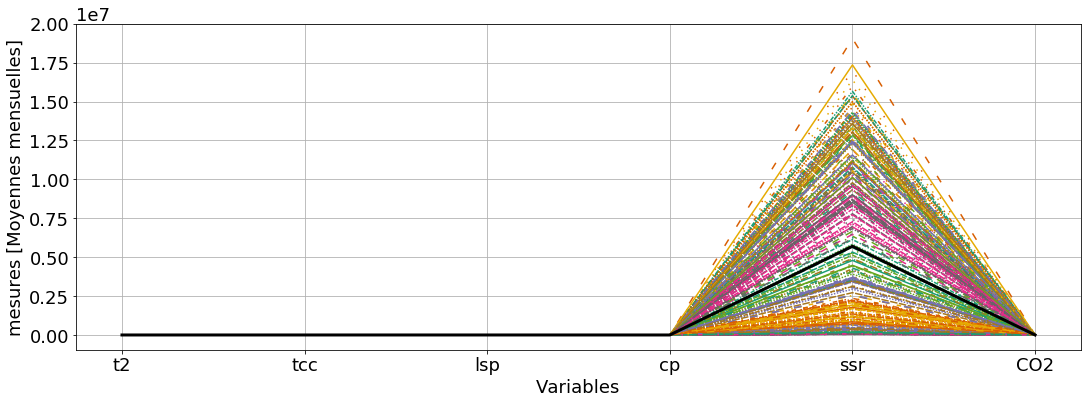

In [14]:
#la figure
for i, (ligne,label) in enumerate(zip(X, nomDesIndividus)):
    plt.plot(ligne, label=label,
             color = couleurs[i%len(couleurs)],
             linestyle=linestyles[(i//len(couleurs))%len(linestyles)])
plt.plot(moyennes,'k-',label="moyenne",linewidth=3)
if len(nomDesIndividus)<30:
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=6, fancybox=True, shadow=True,fontsize=15)
plt.grid(True)
plt.xlabel("Variables")
plt.xticks(list(range(len(nomDesVariables))),nomDesVariables)
plt.ylabel(label_variables) ;

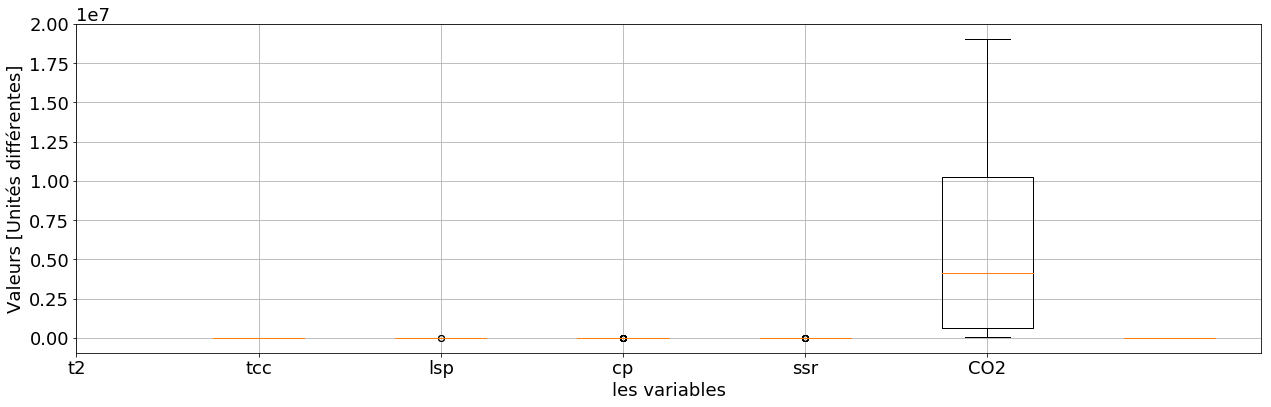

In [15]:
plt.boxplot(X);
#plt.title('Boîtes à moustaches pour chacune des variables')
plt.xticks(list(range(len(nomDesVariables))),nomDesVariables)
plt.xlabel('les variables')
plt.ylabel('Valeurs [Unités différentes]')
plt.grid(True)
plt.tight_layout()

##### Les données centrées (par colonne/variable)

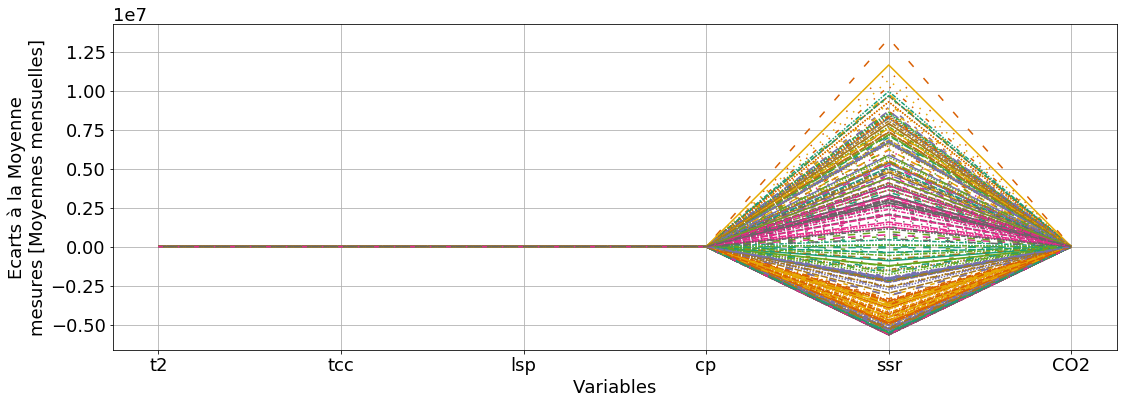

In [16]:
#la figure
for i, (ligne,label) in enumerate(zip(Xc, nomDesIndividus)):
    plt.plot(ligne, label=label,
             color = couleurs[i%len(couleurs)],
             linestyle=linestyles[(i//len(couleurs))%len(linestyles)])
if len(nomDesIndividus)<30:
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=6, fancybox=True, shadow=True,fontsize=15)
plt.grid(True)
plt.xlabel("Variables")
plt.xticks(list(range(len(nomDesVariables))),nomDesVariables)
plt.ylabel("Ecarts à la Moyenne\n"+label_variables) ;

In [17]:
Xcr.shape

(348, 6)

##### Les données centrées réduites (par colonne/variable)

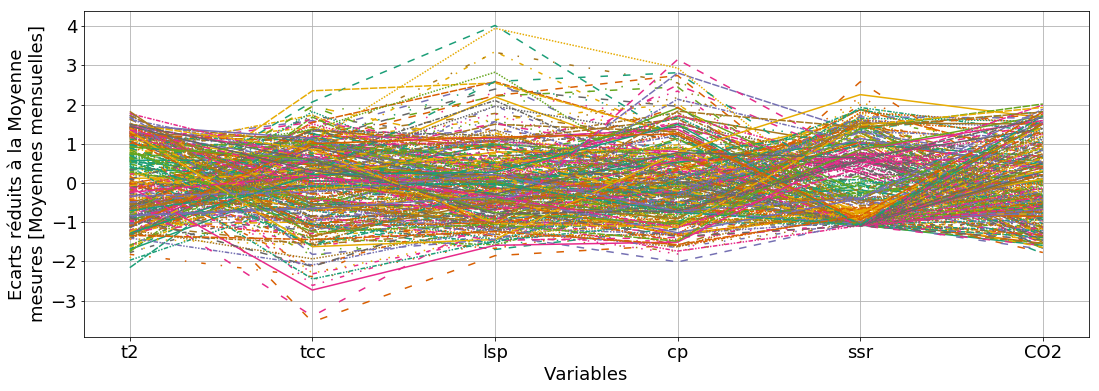

In [18]:
#la figure
for i, (ligne,label) in enumerate(zip(Xcr, nomDesIndividus)):
    plt.plot(ligne, label=label,
             color = couleurs[i%len(couleurs)],
             linestyle=linestyles[(i//len(couleurs))%len(linestyles)])
if len(nomDesIndividus)<30:
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=6, fancybox=True, shadow=True,fontsize=15)
plt.grid(True)
plt.xlabel("Variables")
plt.xticks(list(range(len(nomDesVariables))),nomDesVariables)
plt.ylabel("Ecarts réduits à la Moyenne\n"+label_variables) ;

###### Boïte à moustaches

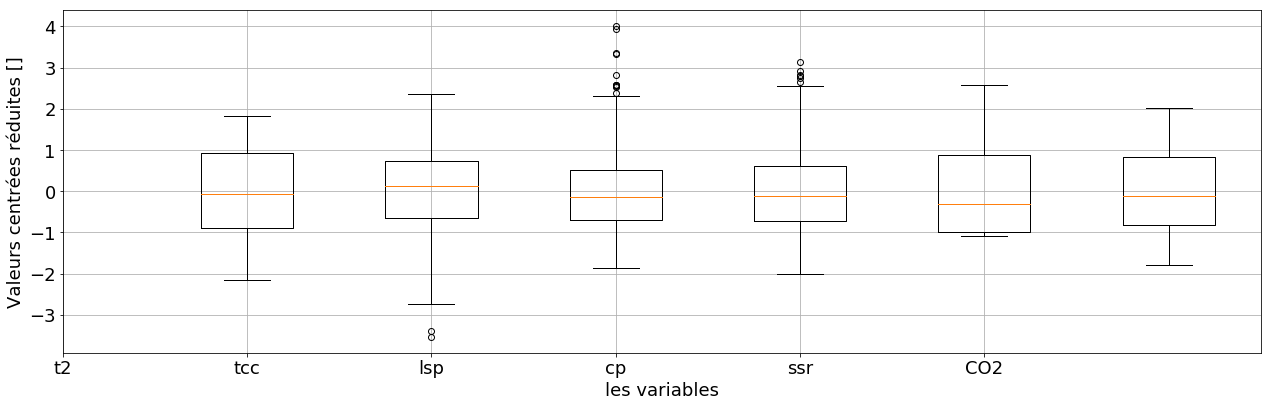

In [19]:
plt.boxplot(Xcr);
#plt.title('Boîtes à moustaches pour chacune des variables')
plt.xticks(list(range(len(nomDesVariables))),nomDesVariables)
plt.xlabel('les variables')
plt.ylabel('Valeurs centrées réduites []')
plt.grid(True)
plt.tight_layout()

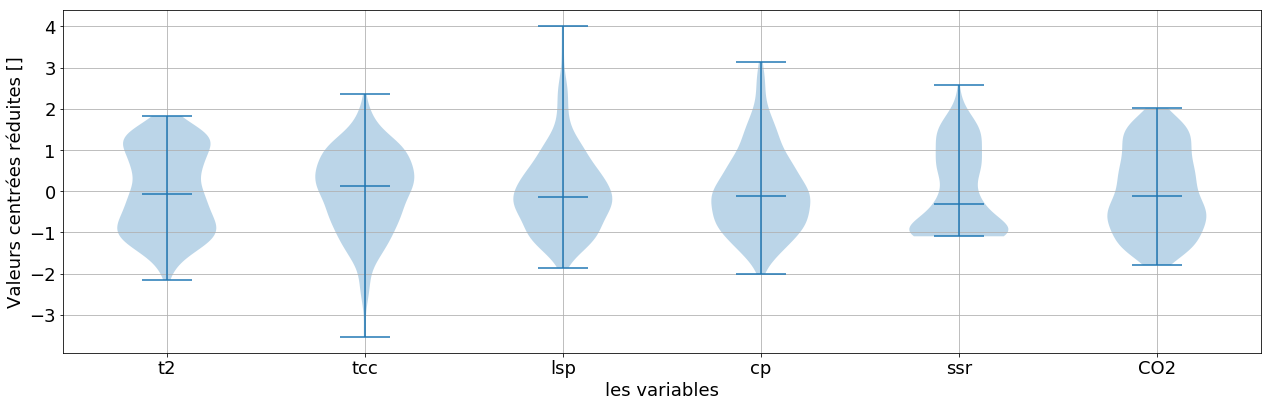

In [20]:
plt.violinplot(Xcr,showmeans=False,showmedians=True)
#plt.title ('Violin plot pour chacune des variables');
plt.xticks(list(range(1,1+len(nomDesVariables))),nomDesVariables)
plt.xlabel('les variables')
plt.ylabel('Valeurs centrées réduites []')
plt.grid(True)
plt.tight_layout()

###### Résumé numérique des données (centrées et réduites)

In [21]:
donnees_cr = pd.DataFrame(data=Xcr, index=nomDesIndividus, columns=nomDesVariables)
donnees_cr.columns = [str(col) + '_cr' for col in donnees_cr.columns]
donnees_cr.describe()

,t2_cr,tcc_cr,lsp_cr,cp_cr,ssr_cr,CO2_cr
count,3.48000e+02,3.48000e+02,3.48000e+02,3.48000e+02,3.48000e+02,3.48000e+02
mean,4.08358e-17,-1.53134e-16,-1.55686e-16,-2.47567e-16,7.84813e-17,-1.06173e-15
std,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00
min,-2.16057e+00,-3.54533e+00,-1.85425e+00,-2.01456e+00,-1.09477e+00,-1.79563e+00
25%,-8.81735e-01,-6.54432e-01,-6.91781e-01,-7.30758e-01,-9.78678e-01,-8.15230e-01
50%,-7.29824e-02,1.35869e-01,-1.31580e-01,-1.09527e-01,-3.03504e-01,-1.06924e-01
75%,9.25119e-01,7.30204e-01,5.13335e-01,6.16531e-01,8.80333e-01,8.30011e-01
max,1.82537e+00,2.35018e+00,4.01644e+00,3.14723e+00,2.58140e+00,2.01319e+00


### Matrice de corrélations

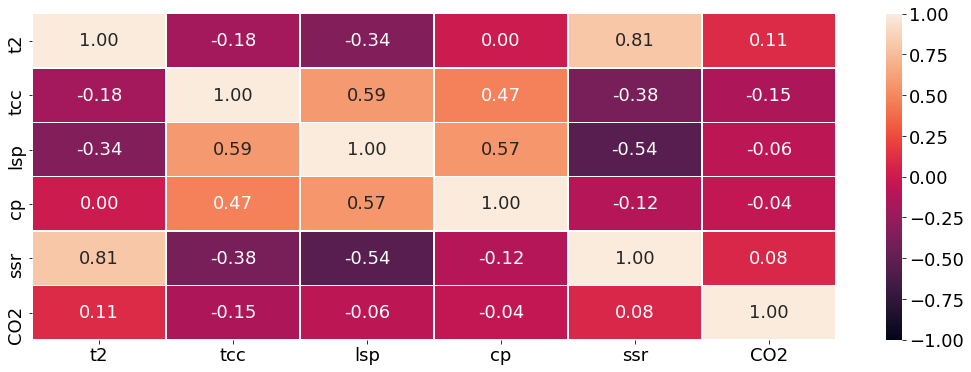

In [22]:
ax = sns.heatmap(lesDonnees.df.corr(), annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

### Diagrammes de dispersion

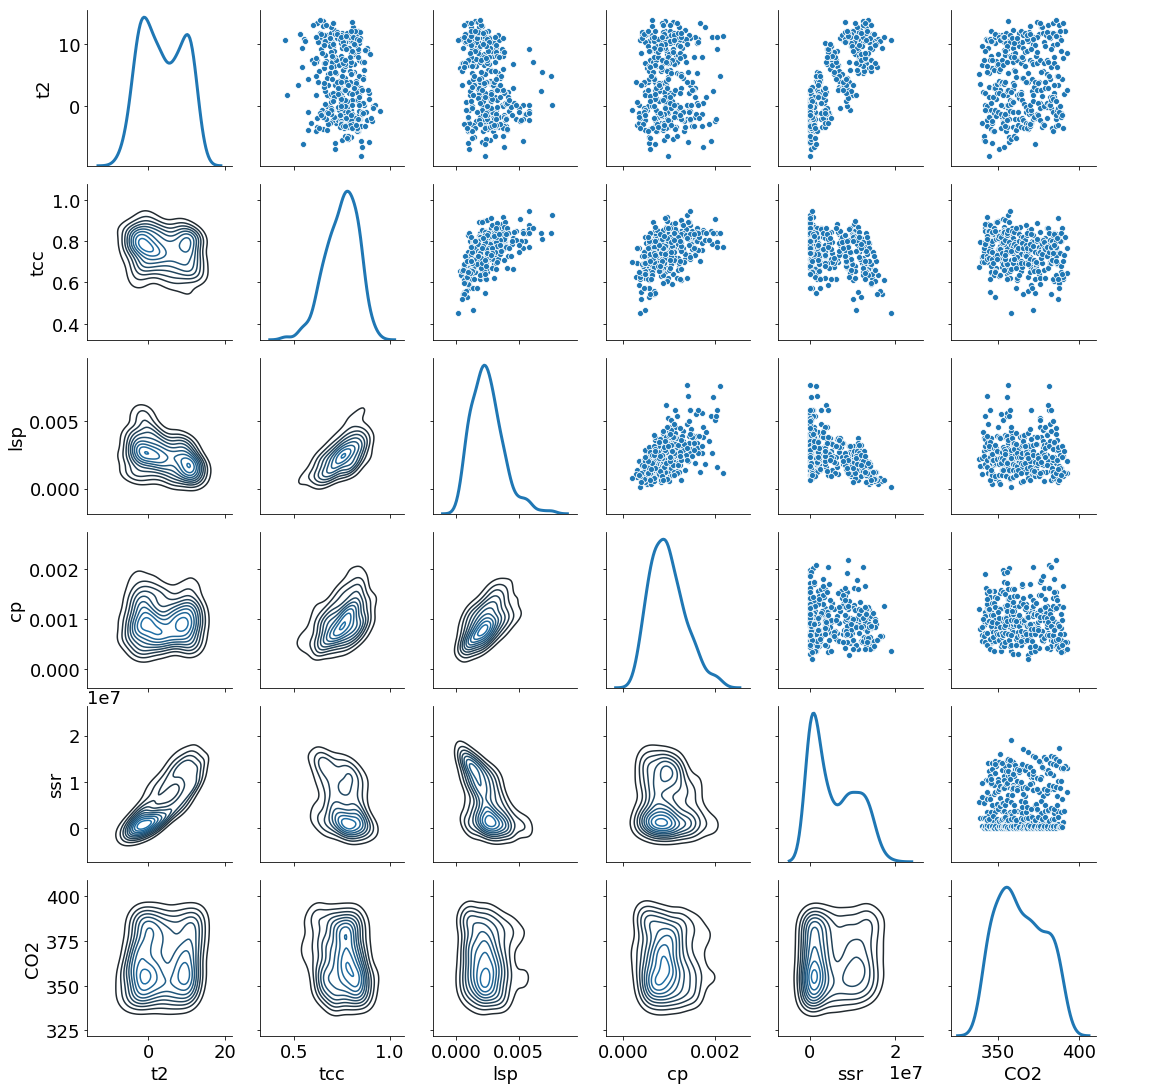

In [23]:
g = sns.PairGrid(lesDonnees.df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3) ;
#g = sns.pairplot(lesDonnees.df, diag_kind="kde", markers="+",
#                  plot_kws=dict(s=50, edgecolor="b", linewidth=1),
#                  diag_kws=dict(shade=True))

***
**On est jamais mieux servi que par soi-même.**  
**If you want something done right, do it yourself.**

[pandas](https://pandas.pydata.org/) - [Numpy and Scipy](https://docs.scipy.org/doc/) - [matplotlib](https://matplotlib.org/) - [scikit-learn](http://scikit-learn.org/stable/) - [seaborn](https://seaborn.pydata.org/)